In [115]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from my_answers import *

%load_ext autoreload
%autoreload 2

from my_answers import *

### load in and normalize the dataset
dataset = np.loadtxt('datasets/normalized_apple_prices.csv')

## Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
# bitcoin_dataset = []
# with open('datasets/bitcoinprices.csv') as f:
#     lines = (line for line in f if not line.startswith('#'))
#     bitcoin_dataset = np.loadtxt(lines, delimiter=',', skiprows=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
len(dataset)

138

Text(0,0.5,'normalized series value')

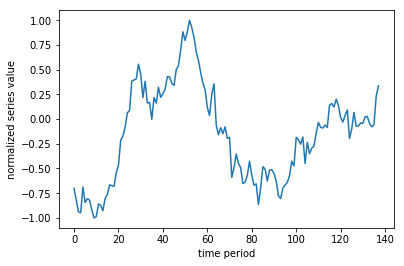

In [117]:
# lets take a look at our time series
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

In [118]:
def window_transform_series(series, window_size = 2):
    # containers for input/output pairs
    X = []
    y = []

    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:window_size])
    y = np.asarray(y)
    y.shape = (len(y),1)
    
    ## numpy strides to extract X
    nrows = len(series) - window_size
    n = series.strides[0]
    X = np.lib.stride_tricks.as_strided(series, shape=(nrows, window_size), strides=(n,n) )
    
    ## get all observations starting window_size + 1
    y = np.reshape(series[window_size:], (nrows, 1))
    return X, y

In [119]:
window_size = 7
X,y = window_transform_series(series = dataset,window_size = window_size)

print(X[0])
print(y[0])

[-0.70062339 -0.82088484 -0.93938305 -0.9471652  -0.68785527 -0.84325902
 -0.80532018]
[-0.82058073]


In [120]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [121]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)

def build_part1_RNN(window_size):
    hidden_units = 5
    data_dim = 1
    timesteps = window_size
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=(timesteps, data_dim)))
    model.add(Dense(1))
    return model


model = build_part1_RNN(window_size)


# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [122]:
# run your model!
model.fit(X_train, y_train, epochs=1000, batch_size=50, verbose=0)

In [123]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [124]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0160045793111
testing error = 0.0139842431039


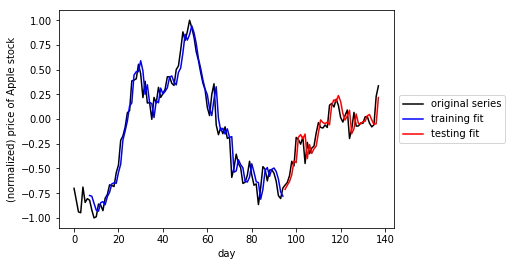

In [125]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()